<a href="https://colab.research.google.com/github/FarrahTharwat/Deep-Learning/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***EDA***

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
mydrive_path = '/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color'
print(os.listdir(mydrive_path))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

Class directory: /content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color/Apple___Apple_scab
Image path: /content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG
Image details: JPEG (256, 256) RGB


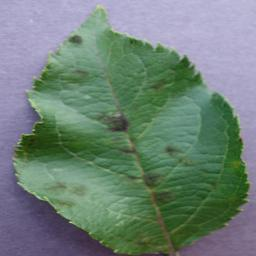

In [ ]:
# Path to the color folder
color_dir = os.path.join("/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset", "color")

# Navigate into the first subdirectory
class_dir = os.path.join(color_dir, os.listdir(color_dir)[0])
print("Class directory:", class_dir)

# Get the first image in the subdirectory
image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
print("Image path:", image_path)

# Load the image
image = Image.open(image_path)

# If you want to check image details (like size, mode, etc.)
print("Image details:", image.format, image.size, image.mode)

# Display the image inline in the notebook
display(image)

Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Potato___healthy: 152 images


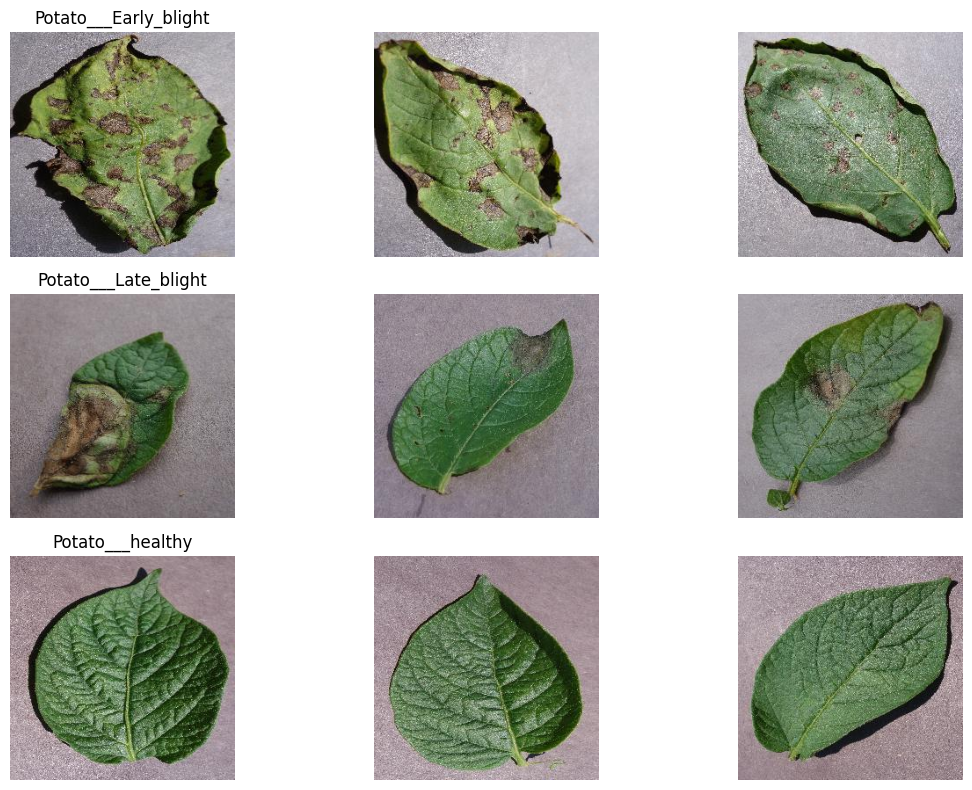

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"  # Update with actual path
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Inspect dataset structure
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_dir))} images")

# Visualize sample images
def visualize_samples(classes, dataset_path, samples_per_class=3):
    fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(12, 8))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_dir)[:samples_per_class]
        for j, img_file in enumerate(image_files):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_name)
    plt.tight_layout()
    plt.show()

visualize_samples(classes, dataset_path)


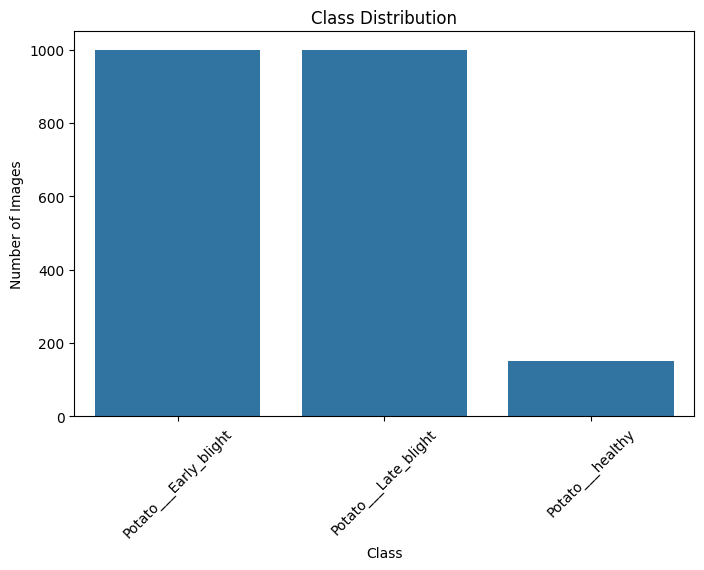

In [ ]:
# Count images per class
image_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes}

# Bar plot for class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.show()

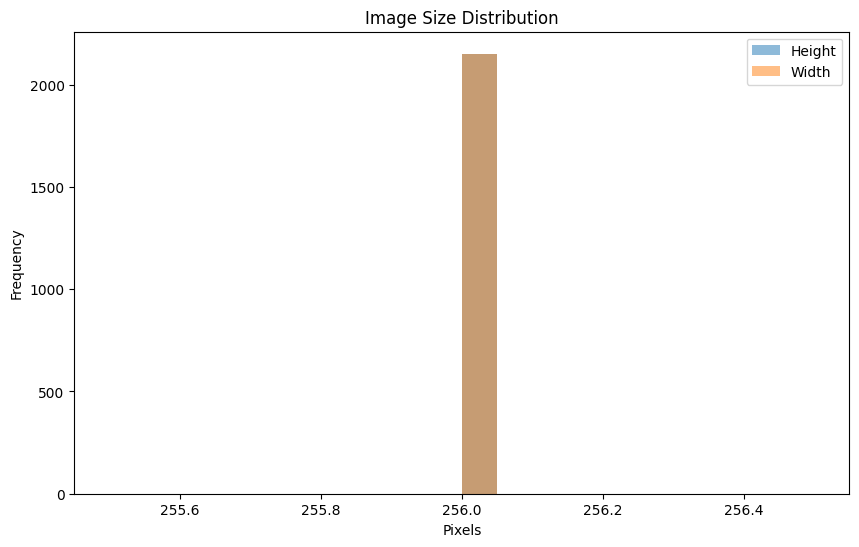

In [ ]:
image_sizes = []
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = cv2.imread(img_path)
        image_sizes.append(img.shape[:2])

# Plot image sizes
heights, widths = zip(*image_sizes)
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.title("Image Size Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Displaying image: /content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG


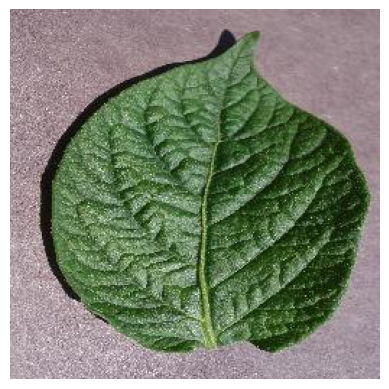

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset path and the healthy class directory
dataset_path = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"
healthy_class_dir = os.path.join(dataset_path, "Potato___healthy")

# List all images in the directory
image_files = os.listdir(healthy_class_dir)

# Check if there are any images in the directory
if image_files:
    # Get the first image file
    image_path = os.path.join(healthy_class_dir, image_files[0])
    print(f"Displaying image: {image_path}")

    # Read and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("No images found in the directory.")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

dataset_path = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"  # Update with actual path

# Paths
healthy_class_dir = os.path.join(dataset_path, "Potato___healthy")

# Load existing images from the underrepresented class
healthy_images = []
for img_file in os.listdir(healthy_class_dir):
    img_path = os.path.join(healthy_class_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize
    healthy_images.append(img)

healthy_images = np.array(healthy_images)

# Data augmentation
augmenter = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

# Generate augmented images
num_augmented = 1000 - len(healthy_images)  # Target: Match other classes (1000 samples)
augmented_images = []
for x, _ in augmenter.flow(healthy_images, np.zeros(len(healthy_images)), batch_size=1):
    augmented_images.append(x[0])
    if len(augmented_images) >= num_augmented:
        break

# Combine original and augmented images
balanced_healthy_images = np.concatenate([healthy_images, np.array(augmented_images)], axis=0)

print(f"Balanced Potato___healthy class size: {len(balanced_healthy_images)}")


Balanced Potato___healthy class size: 1153


In [ ]:
import os
import cv2
# Define the dataset path and the healthy class directory
dataset_path = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"  # Update with actual path

# Paths
healthy_class_dir = os.path.join(dataset_path, "Potato___healthy")

# Save augmented images
for i, img in enumerate(balanced_healthy_images):
    save_path = os.path.join(healthy_class_dir, f"healthy_{i}.JPG")  # Save as PNG format
    cv2.imwrite(save_path, cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR))  # Convert to BGR format for saving

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define path to dataset and classes to filter
DATASET_PATH = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"
POTATO_CLASSES = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Load only the potato classes
potato_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels='inferred',
    label_mode='categorical',  # For classification (use 'int' for integer labels)
    class_names=POTATO_CLASSES,  # Filter for potato classes
    image_size=(224, 224),       # Resize to 224x224
    batch_size=32               # Adjust batch size as needed
)

# Split into train, validation, and test
train_size = 0.8
val_size = 0.1
test_size = 0.1

train_batches = int(len(potato_dataset) * train_size)
val_batches = int(len(potato_dataset) * val_size)
test_batches = len(potato_dataset) - train_batches - val_batches

train_ds = potato_dataset.take(train_batches)
test_val_ds = potato_dataset.skip(train_batches)
val_ds = test_val_ds.take(val_batches)
test_ds = test_val_ds.skip(val_batches)


Found 3152 files belonging to 3 classes.


In [ ]:
# Define preprocessing layers
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values to [0, 1]
    tf.keras.layers.Resizing(224, 224)  # Ensure images are 224x224
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

# Apply preprocessing to datasets
train_ds = train_ds.map(lambda x, y: (data_augmentation(resize_rescale(x)), y))
val_ds = val_ds.map(lambda x, y: (resize_rescale(x), y))
test_ds = test_ds.map(lambda x, y: (resize_rescale(x), y))


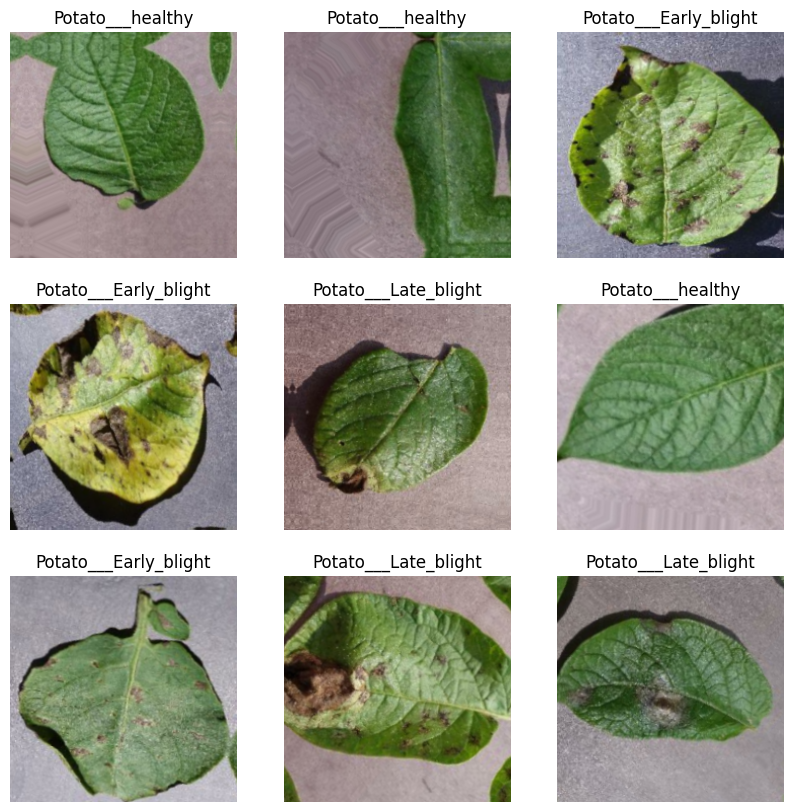

In [ ]:
import matplotlib.pyplot as plt

# Updated visualize function
def visualize_dataset_fixed(dataset, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            image = images[i].numpy()
            image = image * 255  # Scale back to [0, 255]
            plt.imshow(image.astype("uint8"))  # Ensure correct display
            label_index = tf.argmax(labels[i]).numpy()
            plt.title(class_names[label_index])
            plt.axis("off")

# Call the function again
visualize_dataset_fixed(train_ds, POTATO_CLASSES)


In [ ]:
# Data preprocessing and performance optimizations
AUTOTUNE = tf.data.AUTOTUNE

def preprocess_pipeline(dataset):
    return (dataset
            .cache()  # Cache for faster loading
            .shuffle(1000)  # Shuffle buffer
            .prefetch(buffer_size=AUTOTUNE))  # Prefetch for pipeline efficiency

# Apply preprocessing pipeline
train_ds = preprocess_pipeline(train_ds)
val_ds = preprocess_pipeline(val_ds)

Visualizing Train Dataset:
Visualizing Validation Dataset:


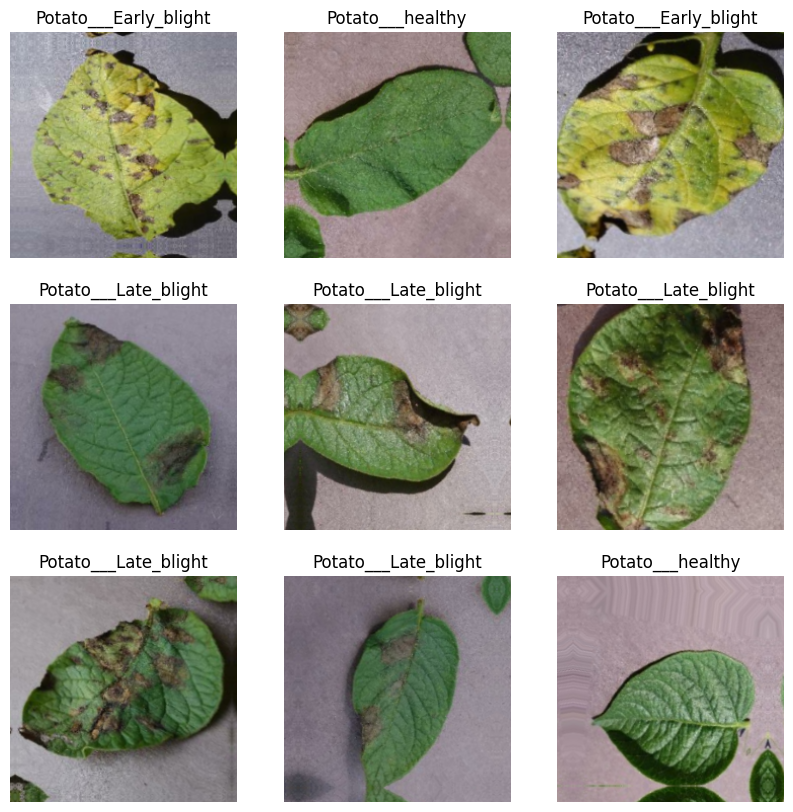

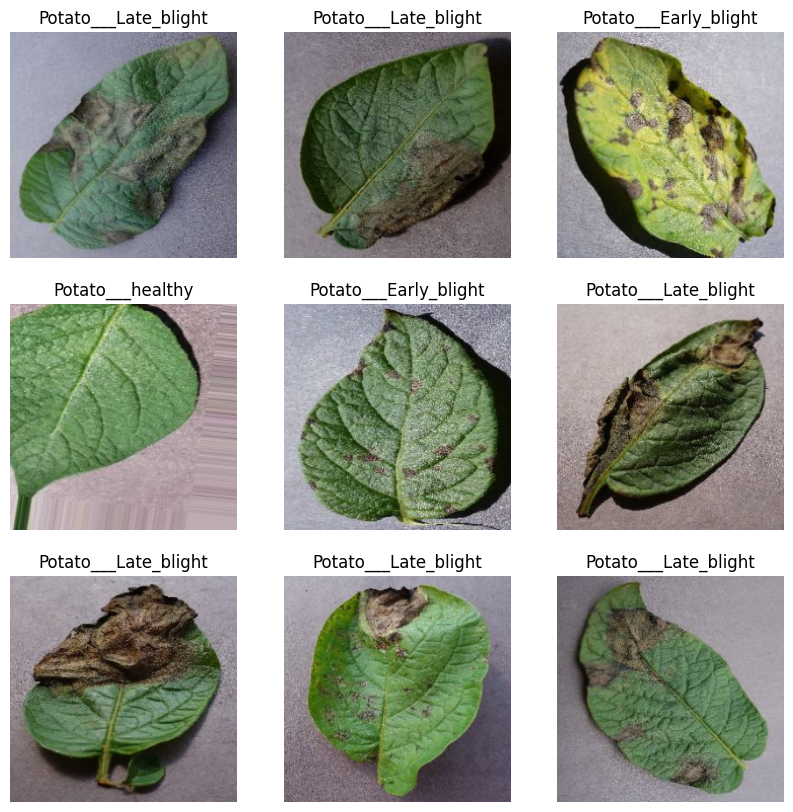

In [ ]:
# Visualization function to show images from the dataset
def visualize_dataset(dataset, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take a batch
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            # Scale the image back to the range 0-255
            image = images[i].numpy().astype("float32")  # Convert to float32
            image = image * 255  # Scale to 0-255
            image = image.astype("uint8")  # Convert back to uint8

            plt.imshow(image)
            class_index = tf.argmax(labels[i]).numpy()
            plt.title(class_names[class_index])
            plt.axis("off")

# Visualize Train Dataset
print("Visualizing Train Dataset:")
visualize_dataset(train_ds, POTATO_CLASSES)

# Visualize Validation Dataset
print("Visualizing Validation Dataset:")
visualize_dataset(val_ds, POTATO_CLASSES)

In [ ]:
import numpy as np

# Count the number of samples in each class for train dataset
class_counts_train = [0] * len(POTATO_CLASSES)
for images, labels in train_ds:
    for label in labels:
        class_index = np.argmax(label)
        class_counts_train[class_index] += 1

print(f"Class distribution in the training set: {dict(zip(POTATO_CLASSES, class_counts_train))}")

Class distribution in the training set: {'Potato___Early_blight': 796, 'Potato___Late_blight': 808, 'Potato___healthy': 924}


# ***MODEL***

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define path to dataset and classes to filter
DATASET_PATH = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"
POTATO_CLASSES = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Load only the potato classes
potato_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels='inferred',
    label_mode='categorical',  # For classification (use 'int' for integer labels)
    class_names=POTATO_CLASSES,  # Filter for potato classes
    image_size=(224, 224),       # Resize to 224x224
    batch_size=32                # Adjust batch size as needed
)

# Split into training and validation datasets
train_size = 0.8
val_size = 0.2

train_batches = int(len(potato_dataset) * train_size)
val_batches = len(potato_dataset) - train_batches

train_ds = potato_dataset.take(train_batches)
val_ds = potato_dataset.skip(train_batches)

# Build ResNet Model (with Dropout)
def residual_block(x, filters, kernel_size=3, stride=1, use_projection=False):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if use_projection:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Data Augmentation
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64, use_projection=False)
    x = residual_block(x, 64, use_projection=False)

    x = residual_block(x, 128, stride=2, use_projection=True)
    x = residual_block(x, 128, use_projection=False)

    x = residual_block(x, 256, stride=2, use_projection=True)
    x = residual_block(x, 256, use_projection=False)

    x = residual_block(x, 512, stride=2, use_projection=True)
    x = residual_block(x, 512, use_projection=False)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Compile the model
model = build_resnet(input_shape=(224, 224, 3), num_classes=3)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
    ]
)


Found 3152 files belonging to 3 classes.
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 998s 12s/step - accuracy: 0.7501 - loss: 0.6731 - val_accuracy: 0.5304 - val_loss: 6.1344
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 932s 12s/step - accuracy: 0.9581 - loss: 0.1229 - val_accuracy: 0.5962 - val_loss: 1.5343
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 938s 12s/step - accuracy: 0.9587 - loss: 0.1042 - val_accuracy: 0.8734 - val_loss: 0.4565
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 933s 12s/step - accuracy: 0.9636 - loss: 0.0926 - val_accuracy: 0.9071 - val_loss: 0.3521
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 928s 12s/step - accuracy: 0.9779 - loss: 0.0665 - val_accuracy: 0.8285 - val_loss: 0.8752
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 940s 12s/step - accuracy: 0.9678 - loss: 0.1004 - val_accuracy: 0.9679 - val_loss: 0.0774
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 967s 12s/step - accuracy: 0.9774 - loss: 0.0729 - val_accuracy: 0.9311 - val_loss: 0.2367
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 909s 12s/step - accuracy:

In [ ]:
# Visualize Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

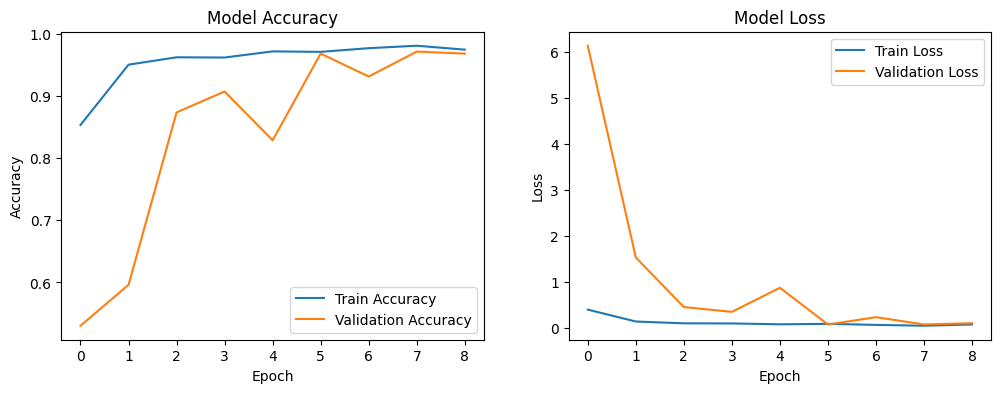

In [ ]:
# Call the function to plot the history
plot_history(history)
# Visualize predictions alongside true labels
def visualize_predictions(images, true_labels, predicted_classes, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[np.argmax(true_labels[i])]}, Pred: {class_names[predicted_classes[i]]}")
        plt.axis("off")

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9811 - loss: 0.0547
Validation Loss: 0.079048752784729
Validation Accuracy: 0.9695512652397156


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
                       precision    recall  f1-score   support

Potato___Early_blight       0.96      1.00      0.98       202
 Potato___Late_blight       0.98      0.92      0.95       190
     Potato___healthy       0.97      0.99      0.98       232

             accuracy     

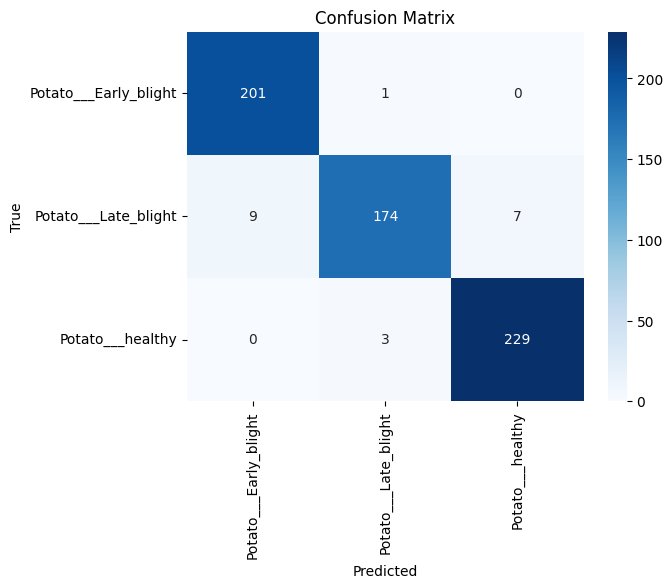

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get true labels and predictions from the validation dataset
y_true = []
y_pred = []
for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Get true class indices
    predictions = model.predict(images)  # Make predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted class indices

# Classification report
print(classification_report(y_true, y_pred, target_names=POTATO_CLASSES))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=POTATO_CLASSES, yticklabels=POTATO_CLASSES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

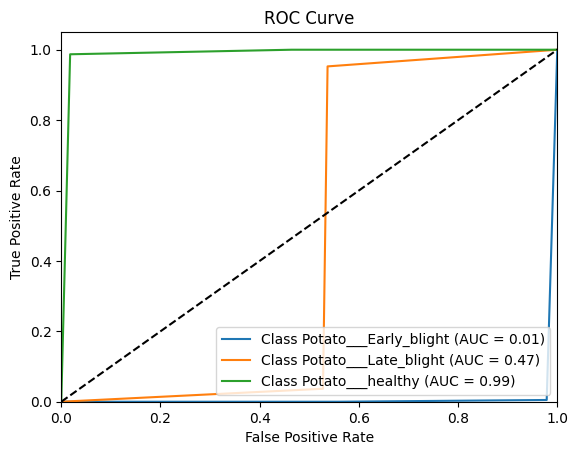

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get class names from the potato_dataset
class_names = potato_dataset.class_names
# Binarize the true labels for ROC (One-vs-Rest approach)
y_true_binarized = label_binarize(y_true, classes=range(len(class_names)))
n_classes = y_true_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred)  # Removed [:, i] for y_pred
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

THATS JUST EXTRA --Tuning

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import class_weight

# Define path to dataset and classes to filter
DATASET_PATH = "/content/drive/MyDrive/Semester 1/Deep/Project/PlantVillage/plantvillage dataset/color"
POTATO_CLASSES = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Load only the potato classes
potato_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels='inferred',
    label_mode='categorical',  # For classification (use 'int' for integer labels)
    class_names=POTATO_CLASSES,  # Filter for potato classes
    image_size=(224, 224),       # Resize to 224x224
    batch_size=32                # Adjust batch size as needed
)

# Split into training, validation, and test datasets
train_size = int(len(potato_dataset) * 0.8)
val_size = int(len(potato_dataset) * 0.1)
test_size = len(potato_dataset) - train_size - val_size

train_ds = potato_dataset.take(train_size)
val_ds = potato_dataset.skip(train_size).take(val_size)
test_ds = potato_dataset.skip(train_size + val_size)

# Preprocessing for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# Compute class weights
all_labels = np.concatenate([y.numpy() for _, y in train_ds], axis=0)
class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.arange(len(POTATO_CLASSES)),
    y=np.argmax(all_labels, axis=1)
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Define Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * y_true * tf.math.pow((1 - y_pred), gamma)
        loss = weight * cross_entropy
        return tf.reduce_sum(loss, axis=1)
    return focal_loss_fixed

# Build ResNet Model with Dropout and Augmentation
def residual_block(x, filters, kernel_size=3, stride=1, use_projection=False):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if use_projection:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Data Augmentation
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)

    # Initial Conv Layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual Blocks
    x = residual_block(x, 64, use_projection=False)
    x = residual_block(x, 64, use_projection=False)

    x = residual_block(x, 128, stride=2, use_projection=True)
    x = residual_block(x, 128, use_projection=False)

    x = residual_block(x, 256, stride=2, use_projection=True)
    x = residual_block(x, 256, use_projection=False)

    x = residual_block(x, 512, stride=2, use_projection=True)
    x = residual_block(x, 512, use_projection=False)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Compile the model with focal loss
model = build_resnet(input_shape=(224, 224, 3), num_classes=len(POTATO_CLASSES))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=focal_loss(gamma=2.0, alpha=0.25),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weights,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("best_model_2.keras", save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-6)
    ]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)


Found 3152 files belonging to 3 classes.
Class Weights: {0: 1.0493980904939808, 1: 1.0480928689883913, 2: 0.914947520810713}
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 919s 11s/step - accuracy: 0.7279 - loss: 0.1136 - val_accuracy: 0.3507 - val_loss: 1.3314 - learning_rate: 1.0000e-04
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 911s 11s/step - accuracy: 0.9099 - loss: 0.0345 - val_accuracy: 0.7847 - val_loss: 0.1136 - learning_rate: 1.0000e-04
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 912s 11s/step - accuracy: 0.9363 - loss: 0.0231 - val_accuracy: 0.3993 - val_loss: 1.3178 - learning_rate: 1.0000e-04
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 926s 11s/step - accuracy: 0.9427 - loss: 0.0155 - val_accuracy: 0.8333 - val_loss: 0.0854 - learning_rate: 1.0000e-04
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 913s 11s/step - accuracy: 0.9437 - loss: 0.0154 - val_accuracy: 0.3646 - val_loss: 1.1909 - learning_rate: 1.0000e-04
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 928s 11s/step - accuracy: 0.9510 - loss: 0.0141 - val_acc